In [1]:
clear all

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import io
import scipy.io as sio
%matplotlib inline 
import pylab
import csv
from Tkinter import Tk
from tkFileDialog import askopenfilename
from tkFileDialog import askdirectory
import nibabel as nb
from scipy import io
#from nifti import NiftiImage
import nibabel as nb
from scipy.interpolate import interp1d
from scipy import ndimage

# Open data

In [3]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/sophie/008C0665790F0763/ComboPanNeuronalGCaMP6/40x/964/964/964ss1cregcU7sMpsfkf250Smith0_4_60TS.mat


In [4]:
Ua=sio.loadmat(filename)
DT=Ua['TSo']
DT.shape

(6127, 250)

In [5]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename2 = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename2)

/media/sophie/008C0665790F0763/ComboPanNeuronalGCaMP6/40x/964/964/964ss1cregcU7sMpsfkf250Smith0_4_60IC.nii


In [6]:
img1 = nb.load(filename2)
data = img1.get_data()
S=data.shape
S

(101, 88, 11, 250)

In [7]:
S=data.shape
S

(101, 88, 11, 250)

Z-score

In [8]:
Demean=np.zeros(S)
Dmaps=np.zeros(S)
Dvar=np.zeros(S)
Var=np.zeros(S[3])
D2=np.zeros([S[0],S[1],5,S[3]])
Tvar=np.zeros(S[3])

In [9]:
for i in range(S[3]):
    Demean[:,:,:,i]=data[:,:,:,i]-np.mean(np.mean(np.mean(data[:,:,:,i],0),0),0)

In [10]:
for i in range(S[3]):
    Dsq=np.reshape(Demean[:,:,:,i],S[0]*S[1]*S[2])
    Var[i]=np.sqrt(np.var(Dsq))
    Dvar=Demean[:,:,:,i]/Var[i]
    Dmaps[:,:,:,i]=Dvar-2.5
    Tvar[i]=np.var(DT[i,:])
Dmaps[Dmaps<0]=0

# Open Masks

In [17]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenameM = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filenameM)
img1 = nb.load(filenameM)
Masks = img1.get_data()
Sm=Masks.shape
Masks=np.array(Masks)

/media/sophie/008C0665790F0763/ComboPanNeuronalGCaMP6/40x/964/964registration/JFRC964Transformedfullpsftrimmed.nii


In [18]:
filenameM='/home/sophie/RegionList'
with open(filenameM) as f:
    content = f.readlines()
Names=[Line.split('\t') for Line in content]
RegionName=[Names[i][0] for i in range(75)]
Num=[int(Names[i][2]) for i in range(75)]

# Average in masks to sort components by brain region

In [19]:
Dmaps.shape

(101, 88, 11, 250)

In [20]:
M=np.zeros((S[3],86))
Mapmean=np.zeros(S[3])
MMasks=np.zeros(86)

In [21]:
for i in range(S[3]):
    Mapmean[i]=np.mean(np.mean(np.mean(Dmaps[:,:,:,i])))
    for j in range(86):
        MMasks[j]=np.mean(np.mean(np.mean(Masks[:,:,:,j])))
        if MMasks[j]:
            M[i,j]=np.mean(np.mean(np.mean(Masks[:,:,:,j]*Dmaps[:,:,:,i])))/(MMasks[j]*Mapmean[i])

In [22]:
CompMainName=S[3]*['']
CompNameAdd=np.zeros((S[3],86))
for i in range(S[3]):
    Max=np.max(M[i,:])
    I=np.argmax(M[i,:])+1
    for j in range(86):
        J=[l for l in range(74) if Num[l]==(j+1)]
        if M[i,j]>0.2*Max:
            CompNameAdd[i,J]=1
    J=[l for l in range(74) if Num[l]==I]
    if J!= []:
        CompMainName[i]=Names[np.array(J)][0]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


In [23]:
J

[73]

NO
238
nodulus


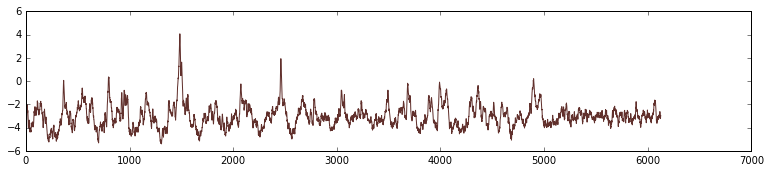

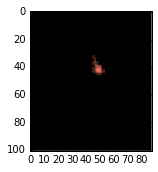

BU_R
134
BU_R
MB_ML_R
EB
158
bulb


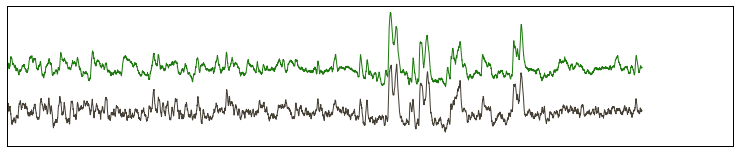

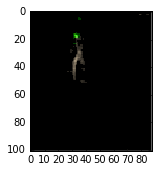

PB
ICL_L
12
PB
13
PB
30
PB
ATL_R
37
PB
ATL_L
44
PB
ATL_R
52
PB
53
PB
ATL_R
67
PB
ATL_R
71
PB
IB_R
147
PB
151
PB
MB_CA_R
CAN_L
IPS_L
170
PB
177
protocerebral bridge


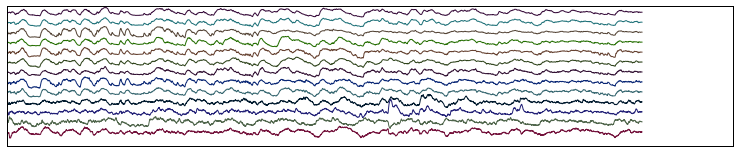

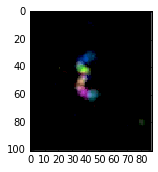

LH_R
MB_ML_R
AL_R
AL_L
4
LH_R
15
lateral horn


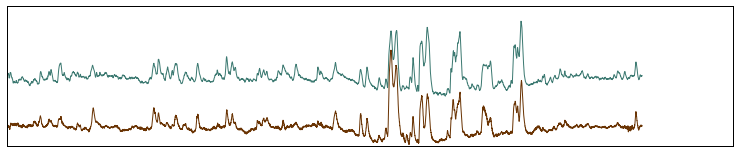

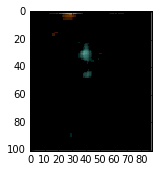

AMMC_R
PRW
42
antennal mechanosensory and motor center


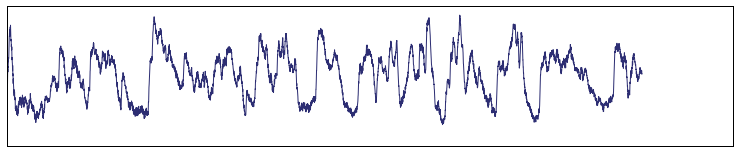

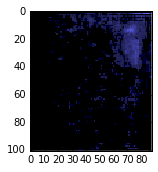

ICL_R
6
ICL_R
MB_PED_R
MB_ML_R
41
inferior clamp


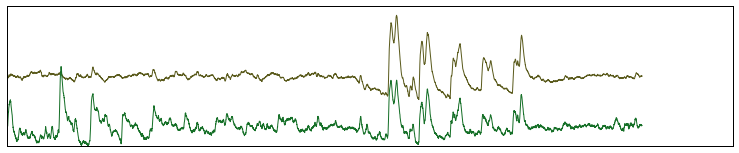

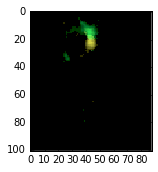

IB_R
192
inferior bridge


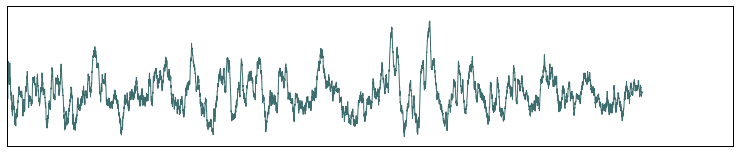

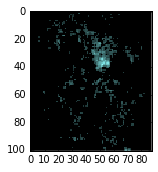

ATL_R
153
antler


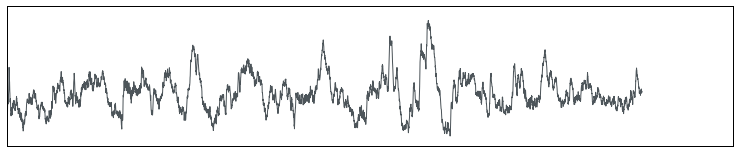

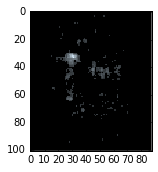

ATL_R
CRE_R
MB_VL_R
MB_ML_R
7
CRE_R
MB_ML_R
100
crepine


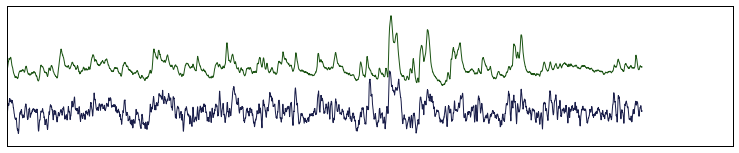

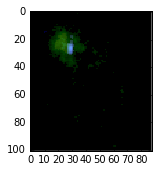

LH_R
MB_VL_R
SIP_R
0
MB_VL_R
SIP_R
SMP_R
39
MB_VL_R
MB_ML_R
SIP_R
43
MB_VL_R
245
vertical lobe of adult mushroom body


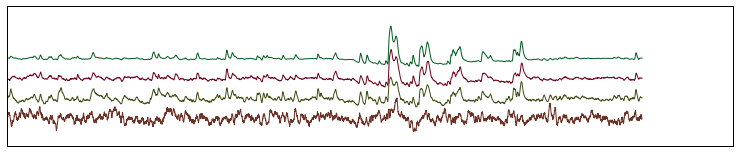

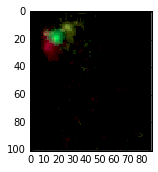

MB_VL_R
MB_ML_R
5
CRE_R
MB_VL_R
MB_ML_R
45
MB_PED_R
MB_ML_R
72
medial lobe of adult mushroom body


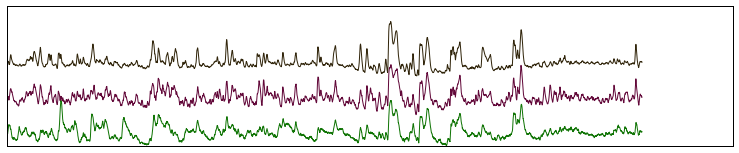

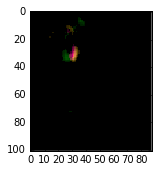

EB
38
EB
FB
BU_L
CRE_L
99
EB
111
BU_R
MB_ML_R
EB
FB
116
EB
121
MB_ML_R
EB
136
MB_ML_R
EB
155
BU_R
MB_ML_R
EB
181
BU_R
PB
EB
FB
199
EB
BU_L
MB_ML_L
225
ellipsoid body


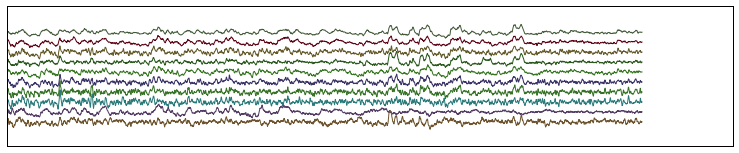

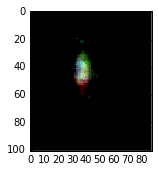

AL_R
AL_L
3
AL_R
AL_L
11
AL_R
AL_L
MB_CA_L
17
AL_R
24
CRE_R
AL_R
MB_CA_R
25
LAL_R
CRE_R
AL_R
LAL_L
35
AL_R
MB_CA_R
AL_L
86
LH_R
LAL_R
AL_R
131
AL_R
145
AL_R
MB_CA_R
152
adult antennal lobe


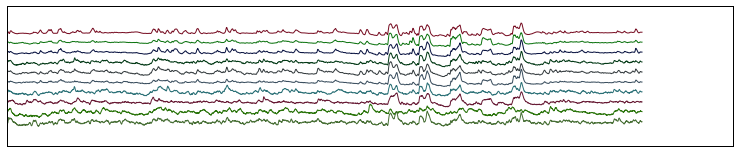

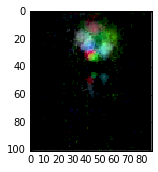

SLP_R
115
SLP_R
190
superior lateral protocerebrum


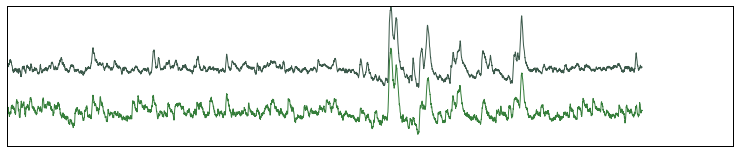

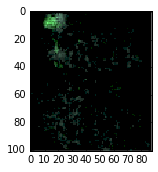

SMP_R
102
SLP_R
SMP_R
172
SMP_R
189
BU_R
SMP_R
216
superior medial protocerebrum


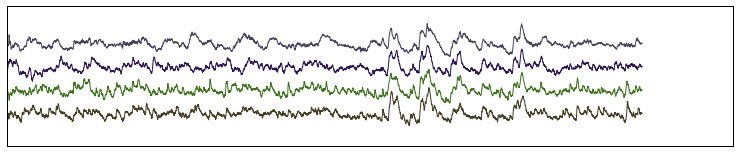

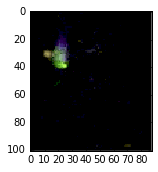

PLP_R
MB_CA_R
SCL_R
66
PLP_R
113
PLP_R
SCL_R
229
PLP_R
236
posterior lateral protocerebrum


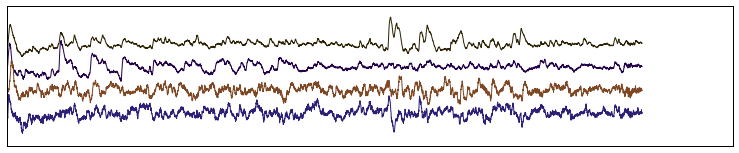

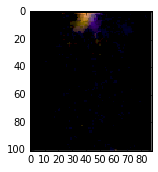

ICL_R
MB_CA_R
1
MB_CA_R
2
MB_CA_R
16
MB_CA_R
32
MB_CA_R
75
MB_CA_R
107
MB_VL_R
MB_CA_R
SCL_R
166
ATL_R
MB_CA_R
180
calyx of adult mushroom body


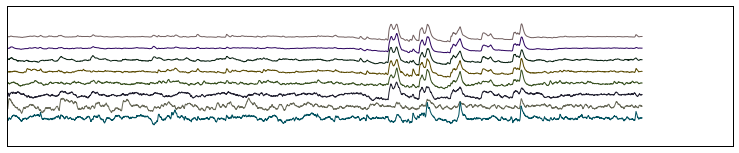

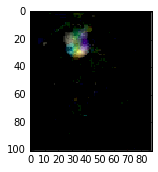

SPS_R
14
superior posterior slope


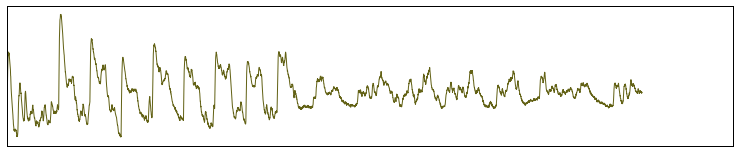

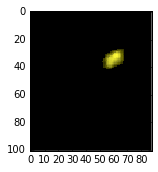

IPS_R
56
IVLP_R
IPS_R
119
inferior posterior slope


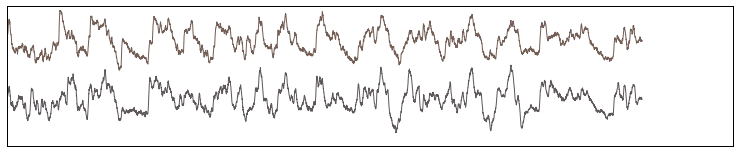

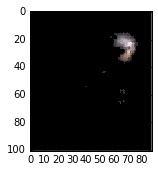

LH_R
SCL_R
26
SLP_R
SCL_R
144
superior clamp


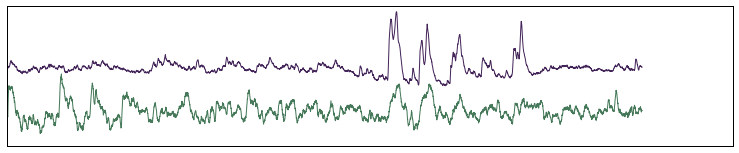

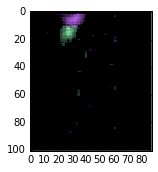

GNG
CAN_L
IPS_L
54
GNG
FLA_L
63
IPS_R
GNG
ATL_L
81
adult gnathal ganglion


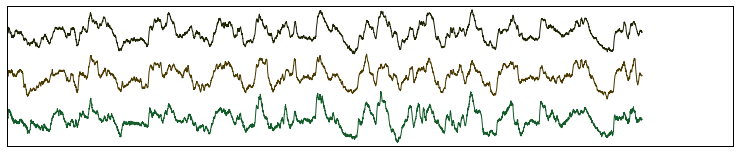

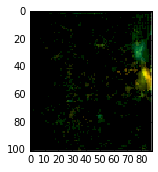

LO_L
AVLP_L
PVLP_L
48
LO_L
49
LO_L
73
LO_L
84
LO_L
91
LO_L
93
LO_L
96
LH_R
ATL_R
LO_L
IPS_L
124
LO_L
129
LO_L
138
LO_L
140
LO_L
142
LO_L
161
LO_L
PVLP_L
168
LO_L
PVLP_L
188
LO_L
194
LO_L
242
lobula


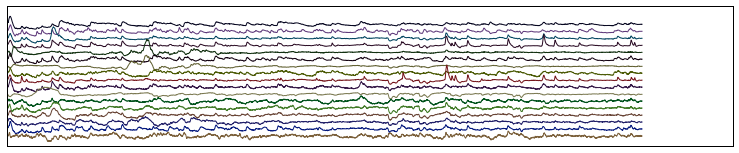

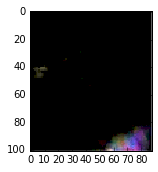

SPS_R
GA_R
BU_L
SPS_L
69
BU_L
228
BU_L
AOTU_L
230
BU_L
233
BU_L
AOTU_L
234
EB
BU_L
ICL_L
235
BU_L
SLP_L
AOTU_L
239
bulb


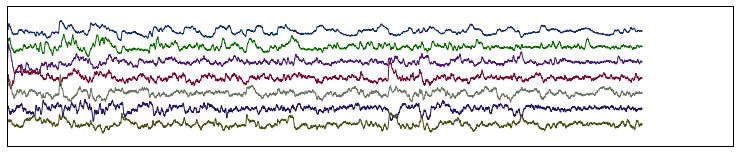

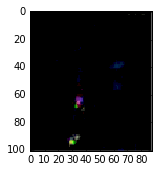

LH_L
8
LH_L
29
LH_L
MB_CA_L
SCL_L
135
BU_R
ATL_R
LH_L
ATL_L
207
LH_L
213
lateral horn


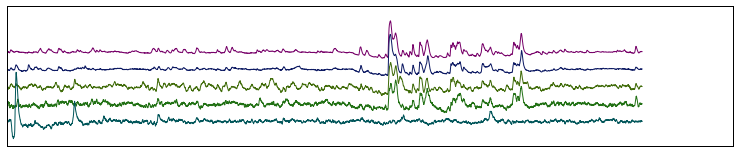

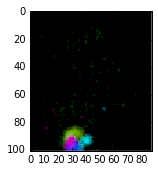

LAL_L
AL_L
MB_CA_L
62
LAL_L
AL_L
MB_CA_L
68
LAL_L
AL_L
78
LAL_L
AL_L
97
lateral accessory lobe


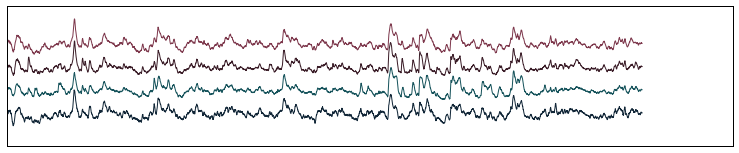

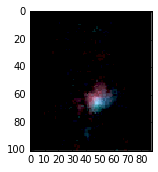

CAN_R
CAN_L
VES_L
SPS_L
50
CAN_L
171
MB_ML_R
SMP_R
CAN_L
196
CAN_L
VES_L
208
CAN_L
232
cantle


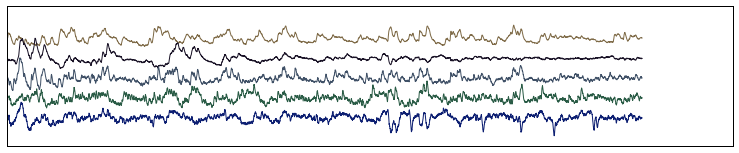

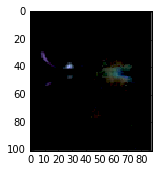

CAN_L
ICL_L
85
ICL_L
185
inferior clamp


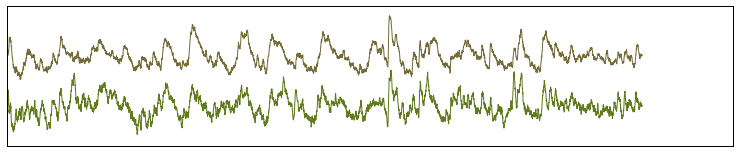

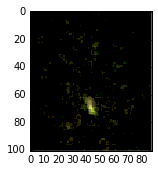

IB_L
112
inferior bridge


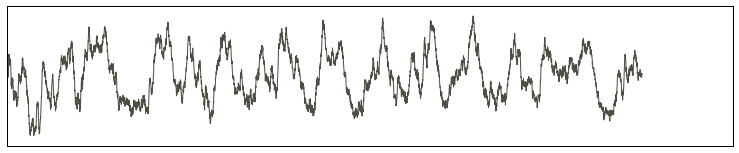

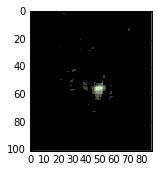

ATL_L
MB_PED_L
106
ATL_R
FB
BU_L
ATL_L
167
antler


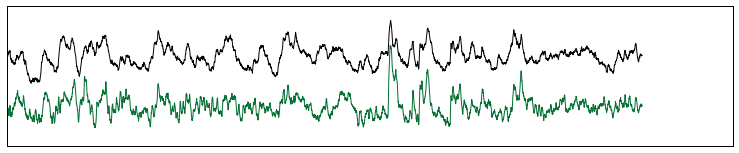

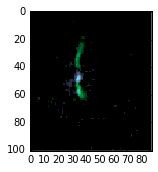

CRE_L
28
CRE_L
MB_VL_L
MB_ML_L
65
CAN_R
CRE_L
SMP_L
103
CRE_L
MB_VL_L
MB_ML_L
159
crepine


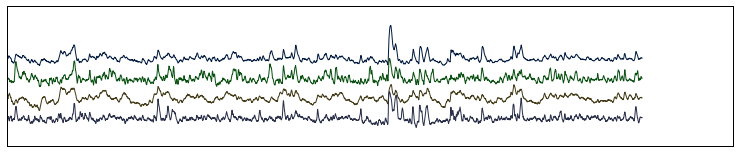

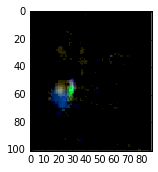

ICL_L
MB_PED_L
MB_ML_L
PLP_L
31
MB_PED_L
162
pedunculus of adult mushroom body


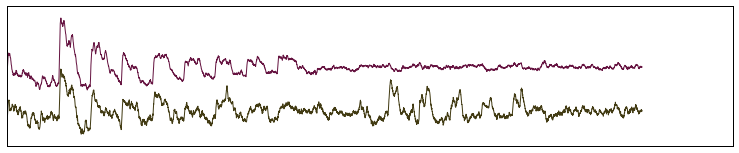

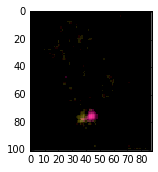

MB_VL_L
21
vertical lobe of adult mushroom body


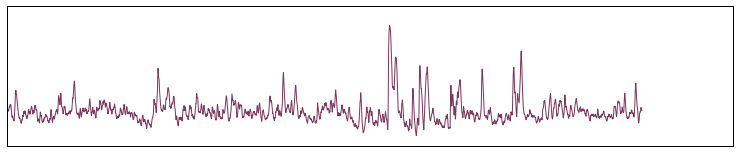

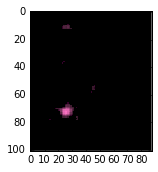

CRE_L
MB_VL_L
MB_ML_L
10
MB_ML_R
CRE_L
MB_ML_L
22
MB_ML_R
BU_L
CRE_L
MB_ML_L
23
CRE_L
MB_PED_L
MB_ML_L
64
CRE_L
MB_ML_L
104
medial lobe of adult mushroom body


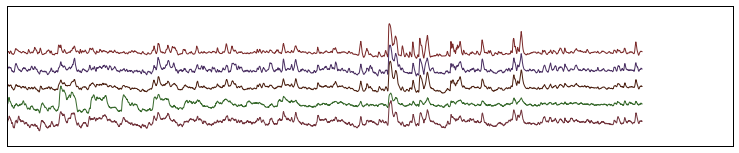

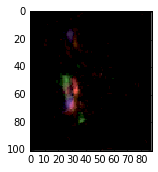

CAN_R
GNG
CAN_L
FLA_L
82
flange


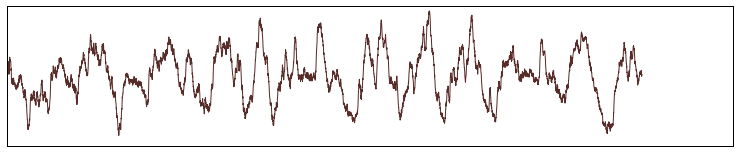

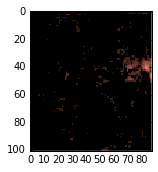

AL_L
18
LAL_L
CRE_L
AL_L
19
AL_L
40
adult antennal lobe


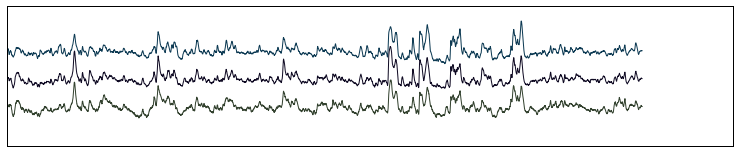

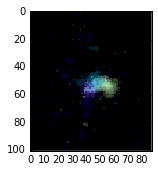

BU_R
LO_L
BU_L
ME_L
33
medulla


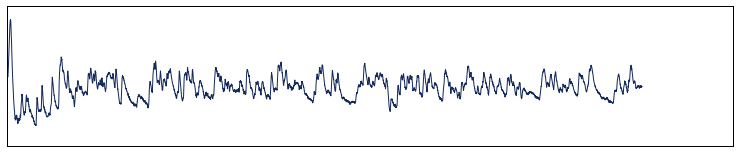

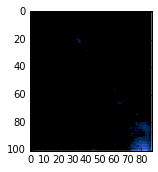

SLP_L
SMP_L
212
superior lateral protocerebrum


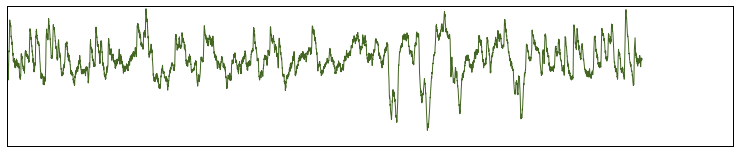

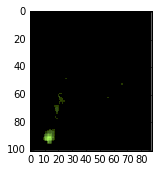

MB_VL_L
SIP_L
SMP_L
87
ATL_L
SMP_L
164
SLP_L
SMP_L
SCL_L
202
SMP_L
211
SMP_L
214
BU_R
ATL_R
FB
SMP_L
220
SMP_L
226
superior medial protocerebrum


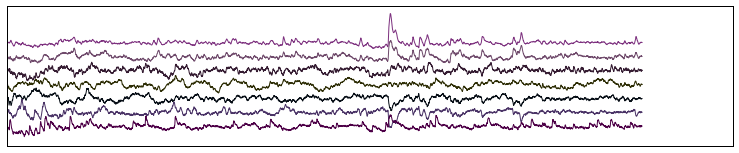

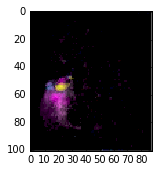

AVLP_L
57
AVLP_L
126
anterior ventrolateral protocerebrum


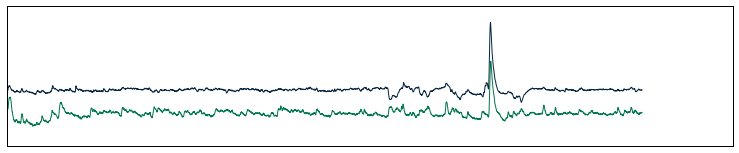

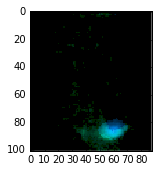

LO_L
PVLP_L
PLP_L
117
BU_R
AVLP_L
PVLP_L
209
posterior ventrolateral protocerebrum


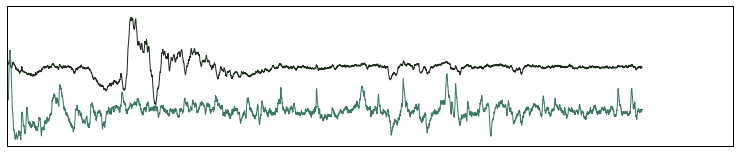

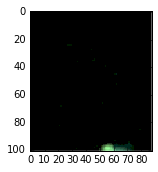

SAD
AMMC_L
IVLP_L
141
wedge


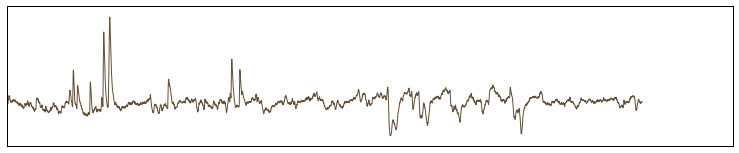

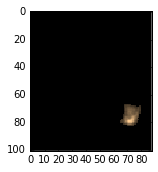

IVLP_L
PLP_L
61
PLP_L
83
PLP_L
88
PLP_L
95
PLP_L
101
PLP_L
148
PLP_L
150
PLP_L
175
PLP_L
176
posterior lateral protocerebrum


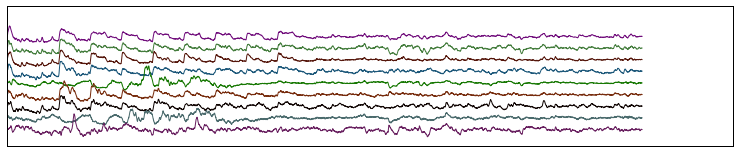

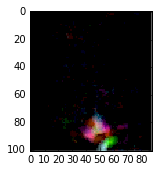

MB_CA_L
36
MB_CA_L
114
BU_R
MB_CA_L
SCL_L
122
MB_CA_L
187
MB_CA_L
195
MB_CA_L
219
MB_CA_L
SCL_L
247
calyx of adult mushroom body


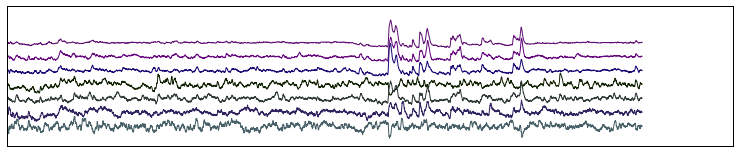

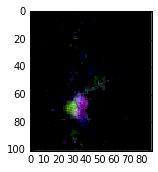

SPS_L
9
SPS_L
70
SPS_L
130
IB_R
IB_L
SPS_L
146
SPS_L
157
superior posterior slope


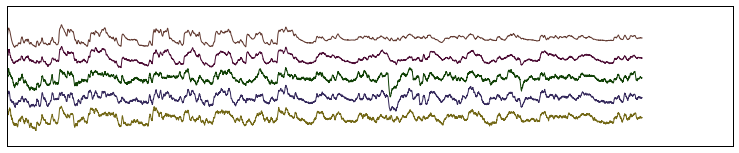

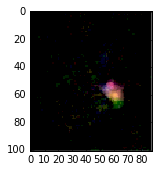

AMMC_L
IVLP_L
IPS_L
47
IPS_L
51
IPS_L
58
IPS_L
79
IPS_L
89
IVLP_L
IPS_L
94
IPS_L
118
IPS_L
137
IPS_L
169
IPS_L
198
inferior posterior slope


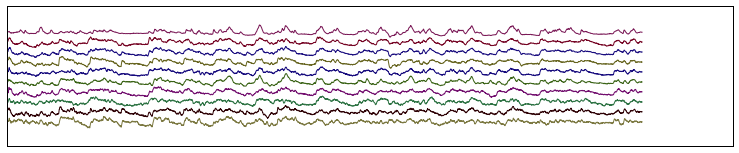

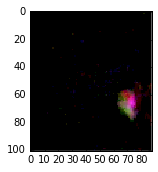

SCL_L
173
SCL_L
182
MB_VL_L
SLP_L
SCL_L
186
BU_R
MB_VL_L
PLP_L
SCL_L
237
superior clamp


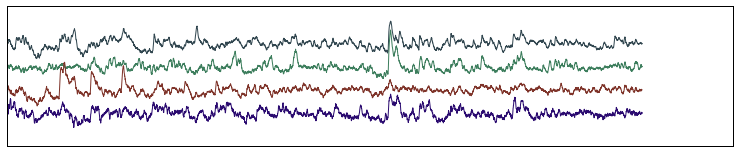

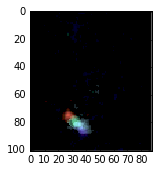

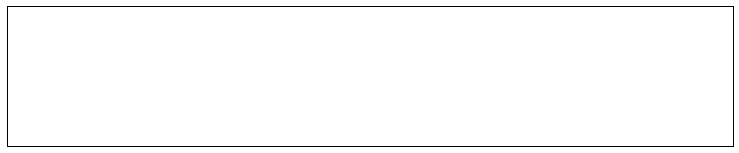

In [24]:
pylab.rcParams['figure.figsize'] = (13, 2.5)

h=5
tot=0
GoodICAnat=np.zeros(S[3])

for l in range(74):
    Final_maps=np.zeros((S[0],S[1],3))
    Fmap=np.zeros((S[0],S[1],3))
    C=np.zeros(3)

    n=0
    for i in range(len(CompMainName)):                    
        Dmmv=np.mean(data[:,:,:,i],2) 
        Dmmv[Dmmv<0.2*np.max(np.max(np.max(Dmmv)))]=0
        C=np.squeeze(np.random.rand(3,1))
        labeled, nrobject=ndimage.label(Dmmv>0)
        
        if CompMainName[i]==Names[l][0] and (sum(CompNameAdd[i,:])<5) and nrobject<200:
            n=n+1            
            
            for k in range(3):
                Fmap[:,:,k]=0.7*Dmmv*C[k]/np.max(C)
            Final_maps=Final_maps+Fmap
            #plt.plot(Time_fluoICA.T,(DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
            plt.plot((DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
            tot=tot+1
            GoodICAnat[i]=1
            #print(i)
            for j in range(86):
                if CompNameAdd[i,j]==1:                
                    print(Names[np.array(j)][0])
            print(i)
            
                    
    if n!=0:
        print(Names[l][1])

        plt.show()
        FM=Final_maps/np.max(np.max(Final_maps))
        FM[FM<0.1]=0
        plt.imshow(FM,interpolation='none')
        plt.show()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        


##### Looked at the components maps and time series and remove all the components which are localized on the edge of the brain and with activity unlike GCaMP6 transients.


In [25]:
BadICs=[]

In [26]:
for idx in BadICs:
    GoodICAnat[idx] = 0.0

# Reorder by larger sub-regions (~ presumed stimulus to motor)

In [27]:
LargerRegionsDic={'':'','AME_R':'OL','LO_R':'OL','NO':'CX','BU_R':'CX','PB':'CX','LH_R':'LH','LAL_R':'LX','SAD':'PENP'
               ,'CAN_R':'PENP','AMMC_R':'PENP','ICL_R':'INP','VES_R':'VMNP','IB_R':'INP','ATL_R':'INP','CRE_R':'INP'
               ,'MB_PED_R':'MB','MB_VL_R':'MB','MB_ML_R':'MB','FLA_R':'PENP','LOP_R':'OL','EB':'CX','AL_R':'AL',
                'ME_R':'OL','FB':'CX','SLP_R':'SNP','SIP_R':'SNP','SMP_R':'SNP','AVLP_R':'VLNP','PVLP_R':'VLNP',
                'IVLP_R':'VLNP','PLP_R':'VLNP','AOTU_R':'VLNP','GOR_R':'VMNP','MB_CA_R':'MB','SPS_R':'VMNP',
                'IPS_R':'VMNP','SCL_R':'INP','EPA_R':'VMNP','GNG':'GNG','PRW':'PENP','GA_R':'LX','AME_L':'OL'
                ,'LO_L':'OL','BU_L':'CX','LH_L':'LH','LAL_L':'LX','CAN_L':'PENP','AMMC_L':'PENP','ICL_L':'INP',
                'VES_L':'VMNP','IB_L':'INP','ATL_L':'INP','CRE_L':'INP','MB_PED_L':'MB','MB_VL_L':'MB',
                'MB_ML_L':'MB','FLA_L':'PENP','LOP_L':'OL','AL_L':'AL','ME_L':'OL','SLP_L':'SNP','SIP_L':'SNP',
                'SMP_L':'SNP','AVLP_L':'VLNP','PVLP_L':'VLNP','IVLP_L':'VLNP','PLP_L':'VLNP','AOTU_L':'VLNP',
                'GOR_L':'VMNP','MB_CA_L':'MB','SPS_L':'VMNP','IPS_L':'VMNP','SCL_L':'INP','EPA_L':'VMNP','GA_L':'LX'}

SmallRegionsSorted=['ME_L','ME_R','LO_R','LO_L','LOP_R','LOP_L','AME_R','AME_L',
                  'PLP_R','PLP_L','PVLP_R','PVLP_L','AVLP_R','AVLP_L','AOTU_R','AOTU_L','IVLP_R','IVLP_L',
                  'AL_R','AL_L',
                  'MB_CA_R','MB_CA_L','MB_PED_R','MB_PED_L','MB_VL_R','MB_VL_L','MB_ML_R','MB_ML_L',
                  'SMP_R','SMP_L','SIP_R','SLP_L','SLP_R','SIP_L',
                  'LH_R','LH_L',                  
                  'CRE_R','CRE_L','ICL_R','ICL_L','SCL_R','SCL_L','IB_R','IB_L','ATL_R','ATL_L',
                  'EB','PB','NO','FB',
                  'BU_R','BU_L','LAL_R','LAL_L','GA_R','GA_L',
                  'GOR_R','GOR_L','EPA_R','EPA_L','VES_R','VES_L','SPS_R','SPS_L','IPS_R','IPS_L',
                  'AMMC_R','AMMC_L','SAD','FLA_R','FLA_L','PRW','CAN_R','CAN_L',
                  'GNG','']

Tozip=range(len(SmallRegionsSorted))
SmallRegionsDic=dict(zip(SmallRegionsSorted,Tozip))

LargerRegion=[LargerRegionsDic[CompMainName[i]] for i in range(S[3])]

LargerRegionInd={ 'OL':1,'VLNP':2,'VMNP':3,'AL':4,'MB':5,'LH':6,'SNP':7,'CX':8,'LX':9,'INP':10,'PENP':11,'GNG':12,'':13}

LargerRegionI=np.array([LargerRegionInd[LargerRegion[i]] for i in range(S[3])])

SmallRegion=np.array([SmallRegionsDic[CompMainName[i]] for i in range(S[3])])

NewOrder=np.argsort(SmallRegion)

SmallRegion[NewOrder]

array([ 0,  0,  0,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,
       11, 11, 13, 13, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19,
       19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 23, 23, 23, 24, 24, 24, 24, 24, 25, 25, 26,
       26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 29, 29,
       29, 29, 29, 29, 29, 31, 32, 32, 34, 34, 34, 35, 35, 35, 35, 35, 35,
       36, 36, 37, 37, 37, 37, 37, 38, 38, 38, 38, 39, 39, 40, 40, 41, 41,
       41, 41, 41, 42, 43, 43, 44, 44, 44, 45, 45, 45, 45, 46, 46, 46, 46,
       46, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47, 47,
       47, 47, 47, 47, 47, 48, 49, 49, 49, 50, 50, 50, 50, 51, 51, 51, 51,
       51, 51, 51, 51, 51, 51, 51, 53, 53, 53, 53, 59, 60, 61, 62, 62, 63,
       63, 63, 63, 63, 63, 64, 64, 64, 64, 65, 65, 65, 65, 65, 65, 65, 65,
       65, 65, 65, 65, 65

In [28]:
LargerRegionIndToName = {v: k for k, v in LargerRegionInd.iteritems()}

In [29]:
LargerRegionI

array([ 5,  5,  5,  4,  6,  5, 10, 10,  6,  3,  5,  4,  8,  8,  3,  6,  5,
        4,  4,  4, 10,  5,  5,  5,  4,  4, 10,  2, 10,  6,  8,  5,  5,  1,
        3,  4,  5,  8,  8,  5,  4, 10, 11,  5,  8,  5,  5,  3,  1,  1, 11,
        3,  8,  8, 12,  1,  3,  2,  3, 12, 11,  2,  9, 12,  5, 10,  2,  8,
        9,  8,  3,  8,  5,  1,  3,  5,  3, 10,  9,  3,  3, 12, 11,  2,  1,
       10,  4,  7,  2,  3,  5,  1,  8,  1,  3,  2,  1,  9, 11,  8, 10,  2,
        7, 10,  5,  8, 10,  5,  3,  5,  3,  8, 10,  2,  5,  7,  8,  2,  3,
        3,  8,  8,  5,  3,  1, 11,  2, 13,  8,  1,  3,  4,  8,  3,  8,  6,
        8,  3,  1,  5,  1,  2,  1,  3, 10,  4,  3,  8,  2,  8,  2,  8,  4,
       10,  3,  8,  3,  3,  8, 10, 11,  1,  5,  1,  7, 13,  5, 10,  1,  3,
        8, 11,  7, 10,  6,  2,  2,  8, 10, 10,  5,  8, 10,  8,  5, 10, 10,
        5,  1,  7,  7, 11, 10,  7,  1,  5, 11, 10,  3,  8,  8, 12,  7,  4,
        5, 13,  8,  6, 11,  2, 10,  7,  7,  6,  7, 13,  7,  3, 10,  5,  7,
       10,  5,  8,  5,  8

In [30]:
GoodICAnat

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,
        1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,
        1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,
        0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,
        0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  1

OL
33
48
49
73
84
91
93
96
124
129
138
140
142
161
168
188
194
242


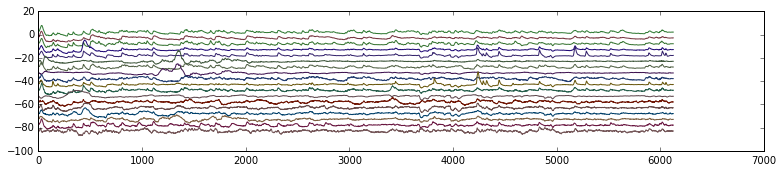

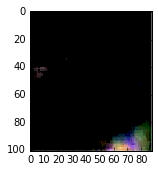

VLNP
57
61
66
83
88
95
101
113
117
126
141
148
150
175
176
209
229
236


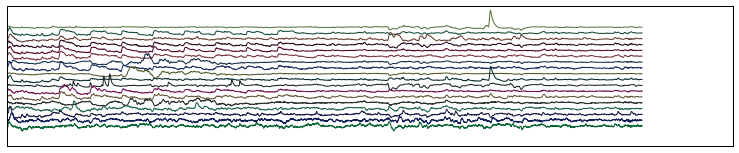

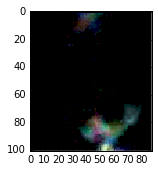

VMNP
9
14
47
51
56
58
70
79
89
94
118
119
130
137
146
157
169
198


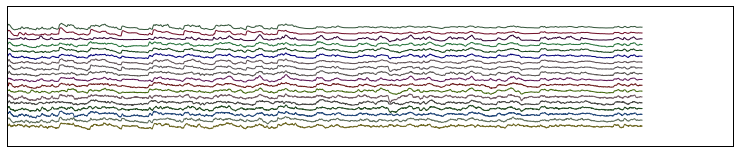

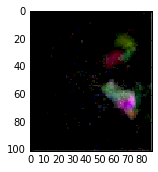

AL
3
11
17
18
19
24
25
35
40
86
131
145
152


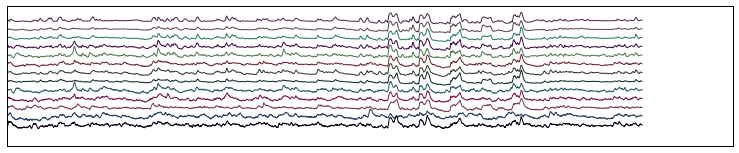

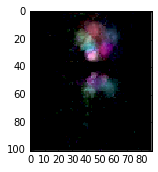

MB
0
1
2
5
10
16
21
22
23
31
32
36
39
43
45
64
72
75
104
107
114
122
162
166
180
187
195
219
245
247


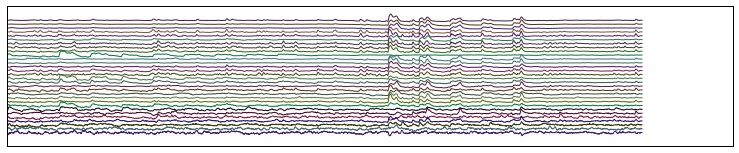

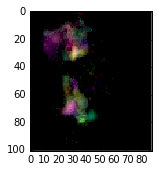

LH
4
8
15
29
135
207
213


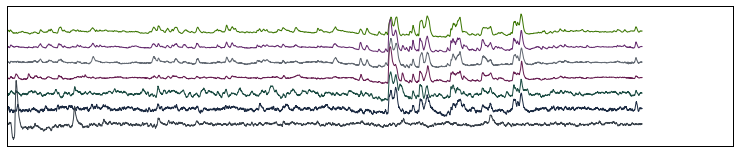

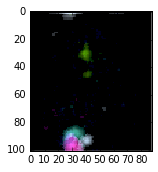

SNP
87
102
115
164
172
189
190
202
211
212
214
216
220
226


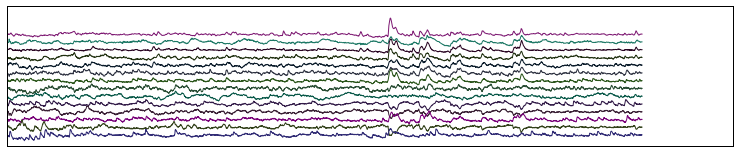

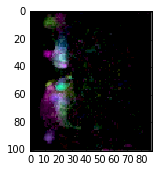

CX
12
13
30
37
38
44
52
53
67
69
71
99
111
116
121
134
136
147
151
155
158
170
177
181
199
225
228
230
233
234
235
238
239


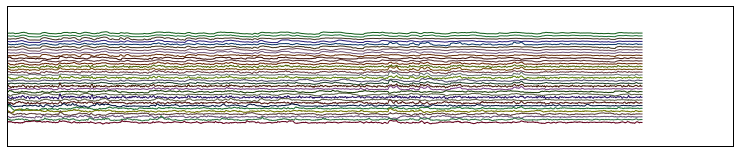

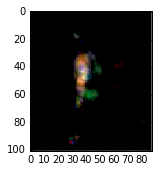

LX
62
68
78
97


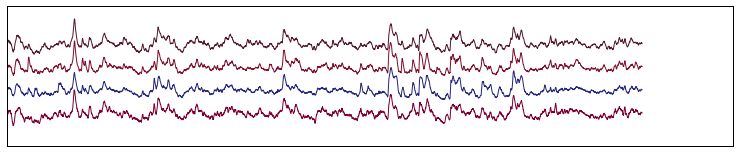

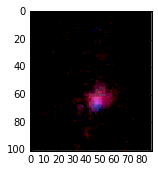

INP
6
7
26
28
41
65
85
100
103
106
112
144
153
159
167
173
182
185
186
192
237


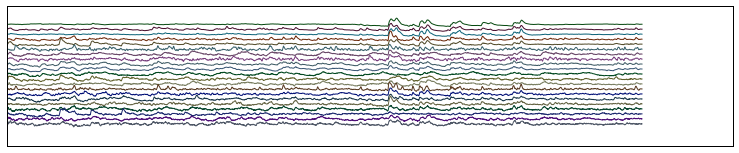

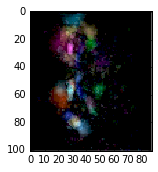

PENP
42
50
82
171
196
208
232


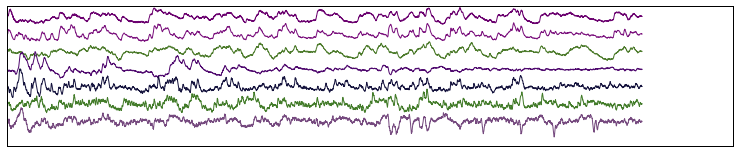

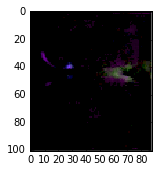

GNG
54
63
81


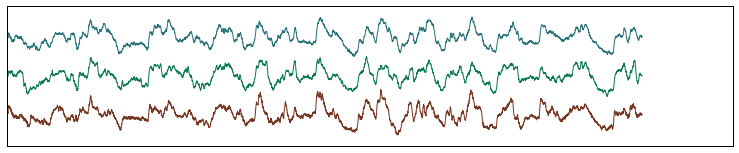

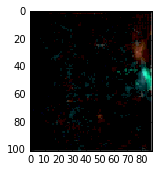

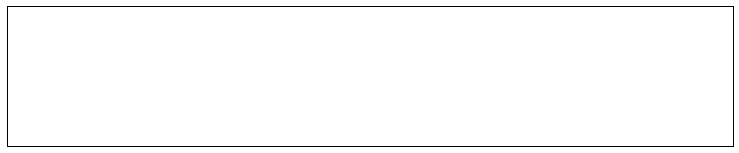

In [31]:
pylab.rcParams['figure.figsize'] = (13, 2.5)

h=5
tot=0
NumberInLargeRegion=np.zeros(13)

for l in range(1,13):
    print(LargerRegionIndToName[l])
    Final_maps=np.zeros((S[0],S[1],3))
    Fmap=np.zeros((S[0],S[1],3))
    C=np.zeros(3)

    n=0
    for i in range(len(CompMainName)):                    
        Dmmv=np.mean(data[:,:,:,i],2) 
        Dmmv[Dmmv<0.2*np.max(np.max(np.max(Dmmv)))]=0
        C=np.squeeze(np.random.rand(3,1))
        labeled, nrobject=ndimage.label(Dmmv>0)
        
        if LargerRegionI[i]==l:          
            if GoodICAnat[i]==1:
                for k in range(3):
                    Fmap[:,:,k]=0.7*Dmmv*C[k]/np.max(C)
                Final_maps=Final_maps+Fmap
                #plt.plot(Time_fluoICA.T,(DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
                plt.plot((DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
                tot=tot+1
                print(i)
                n=n+1 
                    
    if n!=0:

        plt.show()
        FM=Final_maps/np.max(np.max(Final_maps))
        FM[FM<0.1]=0
        plt.imshow(FM,interpolation='none')
        plt.show()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        
    NumberInLargeRegion[l]=n

In [32]:
# Output number of component per region
np.savetxt('/'.join(filename.split('/')[:-1])+'/NumberInLargeRegions.txt',NumberInLargeRegion)